# №2 Датасет для исследования методов заполнения пропусков
## Pima Indians Diabetes Database
Predict the onset of diabetes based on diagnostic measures

Оригинальный датасет:
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


Соревнование:
https://www.kaggle.com/competitions/predict-the-diabetes/

In [1]:
import sys
import os

sys.path.append('..')
folder_path = os.path.abspath(os.path.join(os.getcwd(), "../../../train"))
sys.path.append(folder_path)

In [2]:
import missingno as msno
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Alg_CatBoost import CatBoostRegressor_fill 
from Alg_DecisionTree import DecisionTreeRegressor_fill
from Alg_Interpolate import interpolate_fill
from Alg_KNNImputer import KNNImputer_fill
from Alg_LinearRegression import LinearRegression_fill
from Alg_max import max_fill
from Alg_mean import mean_fill 
from Alg_median import median_fill
from Alg_min import min_fill
from Alg_RandomForestRegressor import RandomForestRegressor_fill
from Alg_SVR import SVR_fill
from Alg_XGBRegressor import XGBRegressor_fill

In [3]:
#для отображения 100 строк на разных типах объектов
pd.options.display.max_rows = 100

In [4]:
#считываем данные
df = pd.read_csv('train.csv')
df.shape

(466, 10)

# 1. Исследуем данные

Информация об атрибутах:
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [5]:
#примеры экземпляров и размерность
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,6,148,72,35,0,33.6,0.627,50,1,0
1,8,183,64,0,0,23.3,0.672,32,1,2
2,1,89,66,23,94,28.1,0.167,21,0,3
3,10,115,0,0,0,35.3,0.134,29,0,7
4,2,197,70,45,543,30.5,0.158,53,1,8
...,...,...,...,...,...,...,...,...,...,...
461,2,88,58,26,16,28.4,0.766,22,0,760
462,9,170,74,31,0,44.0,0.403,43,1,761
463,9,89,62,0,0,22.5,0.142,33,0,762
464,10,101,76,48,180,32.9,0.171,63,0,763


In [6]:
# удалим столбец Id
df.drop(columns='Id', inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,10,115,0,0,0,35.3,0.134,29,0
4,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
461,2,88,58,26,16,28.4,0.766,22,0
462,9,170,74,31,0,44.0,0.403,43,1
463,9,89,62,0,0,22.5,0.142,33,0
464,10,101,76,48,180,32.9,0.171,63,0


In [7]:
# наименования признаков
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# проверим данные на типы
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
# проверим на пропуски
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# проверим на дисбаланс классов
df['Outcome'].value_counts()

0    290
1    176
Name: Outcome, dtype: int64

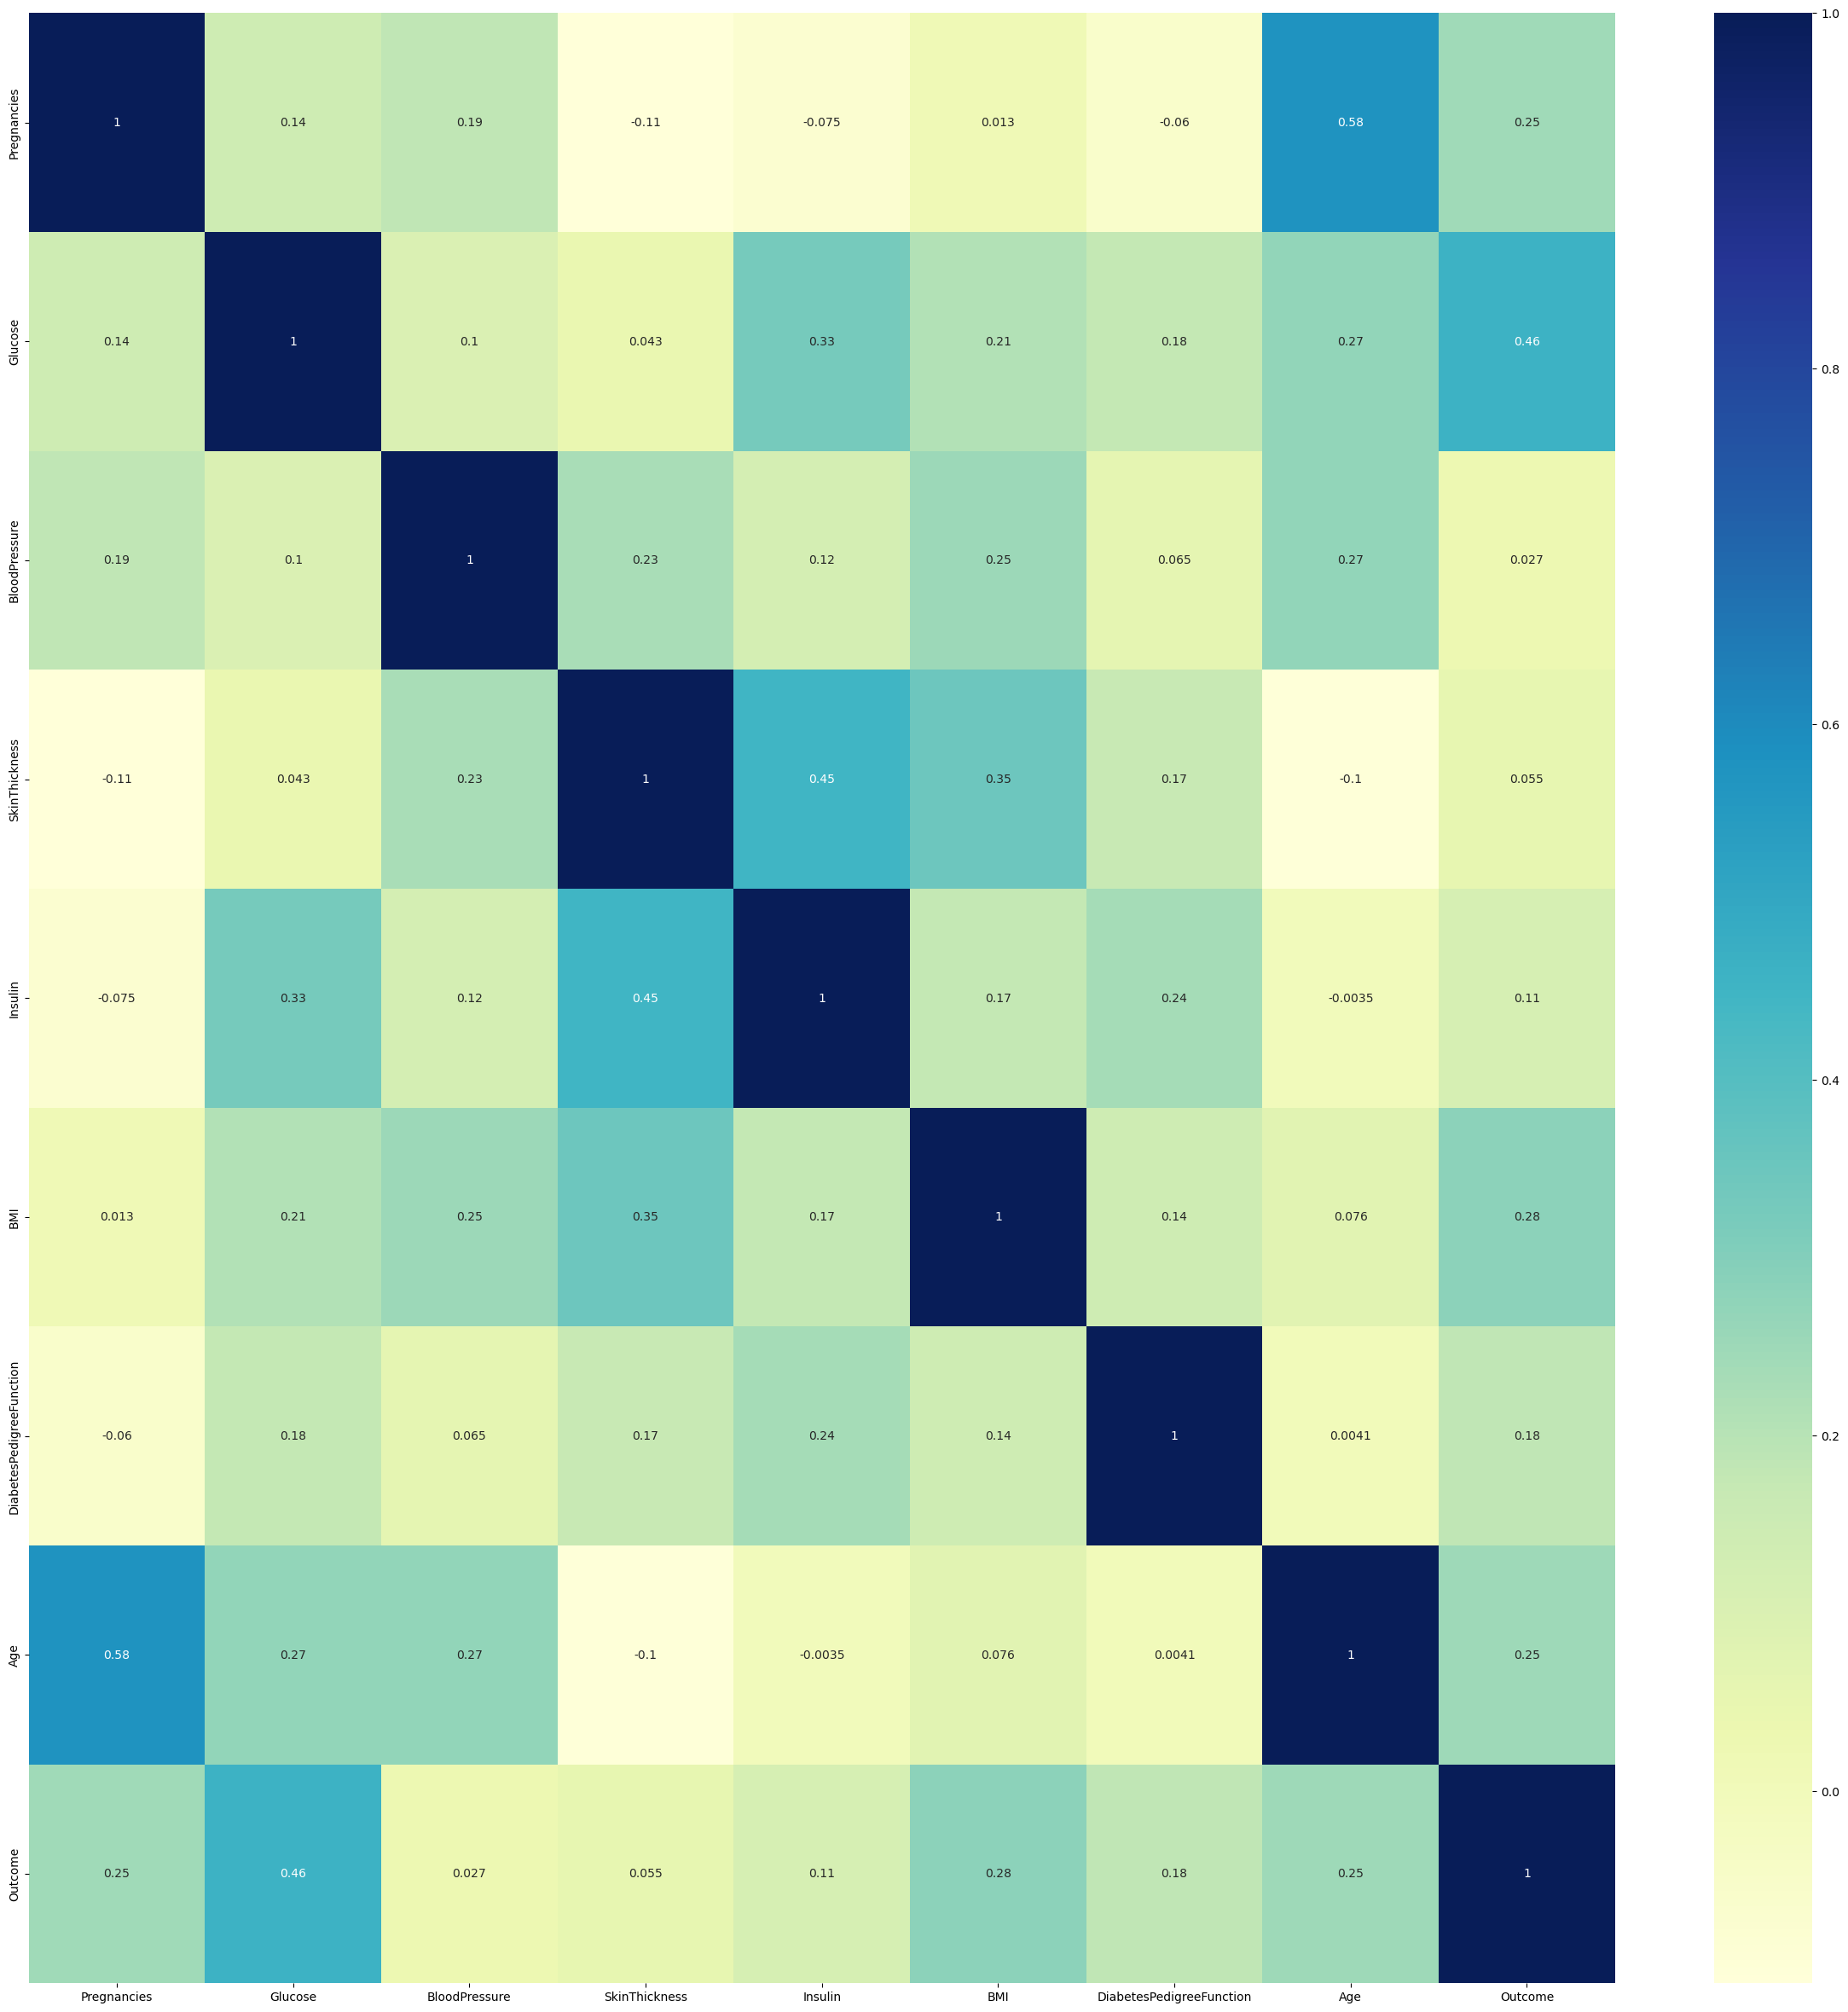

In [11]:
# построим корреляционную матрицу
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),cmap='YlGnBu', annot=True)

plt.savefig('train_corr')

# 2. Произведем предобработку данных

In [12]:
# будем обрабатывать data
data = df.copy()
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,10,115,0,0,0,35.3,0.134,29,0
4,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
461,2,88,58,26,16,28.4,0.766,22,0
462,9,170,74,31,0,44.0,0.403,43,1
463,9,89,62,0,0,22.5,0.142,33,0
464,10,101,76,48,180,32.9,0.171,63,0


## 2.1 Устранение дубликатов

Проверяем наличие дубликатов и удаляем их

In [13]:
print('before: {}'.format(data.shape))

data.drop_duplicates(inplace=True)
print('after: {}'.format(data.shape))

before: (466, 9)
after: (466, 9)


## 2.2 Определение пропущенных значений

In [14]:
(data == 0).sum()

Pregnancies                  62
Glucose                       3
BloodPressure                27
SkinThickness               137
Insulin                     224
BMI                           5
DiabetesPedigreeFunction      0
Age                           0
Outcome                     290
dtype: int64

Нули найдены в признаках: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Outcome. 

В Pregnancies(беременнности) и Outcome(результат) нули допустимы. В признаках Glucose(уровень глюкозы), BloodPressure(Кровяное давление), SkinThickness (толщина кожного покрова), Insulin (уровень инсулина), BMI (индекс массы тела) нулевые значения необходимо интерпретировать как пропущенные и заменить на NAN.

In [15]:
missing_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [16]:
for col in missing_columns:
    data.loc[data[col] == 0.0, col] = np.NAN
data[missing_columns].isna().sum()

Glucose            3
BloodPressure     27
SkinThickness    137
Insulin          224
BMI                5
dtype: int64

<AxesSubplot:>

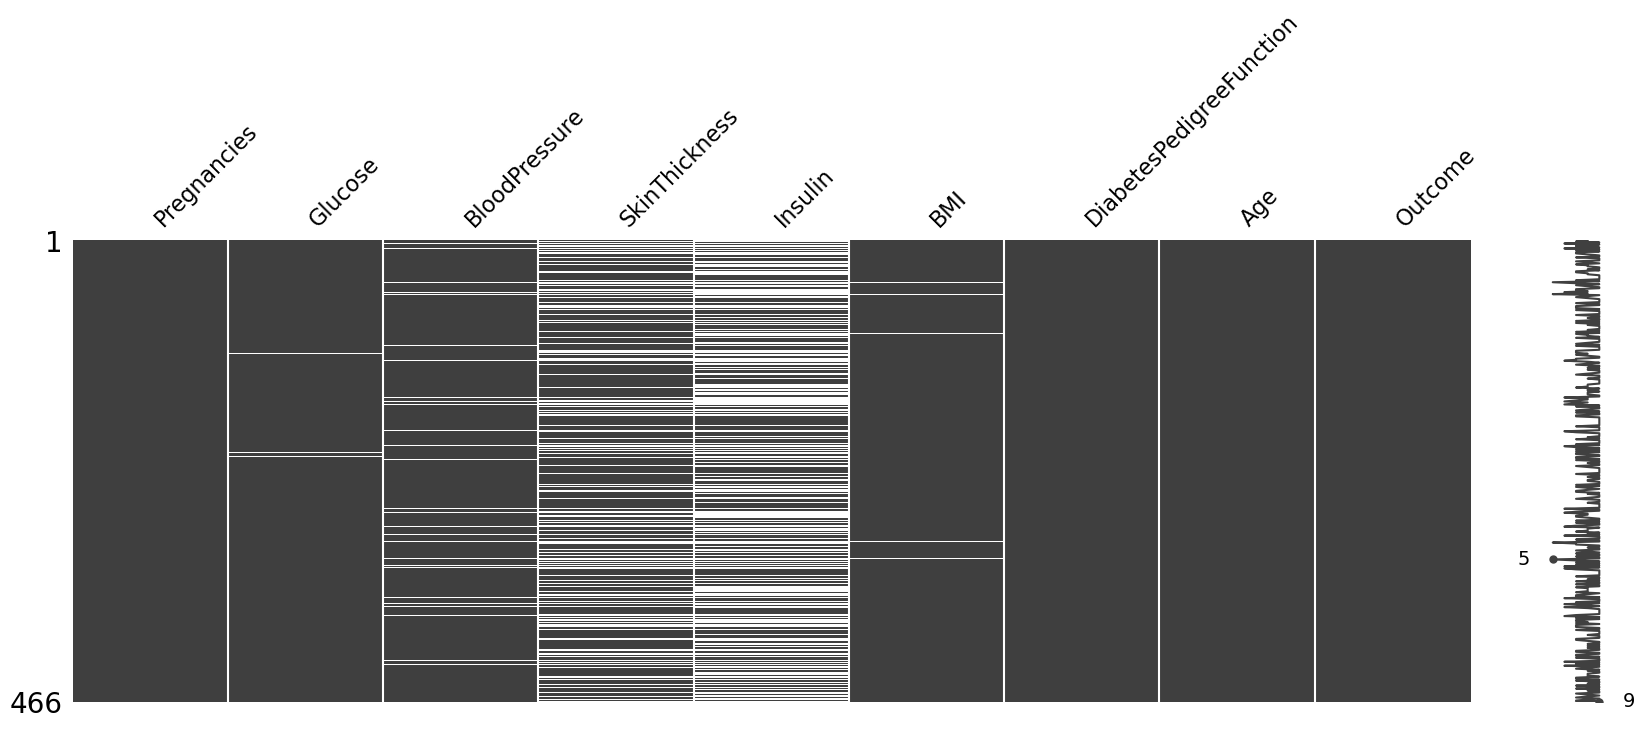

In [17]:
msno.matrix(data, figsize = (20, 6))

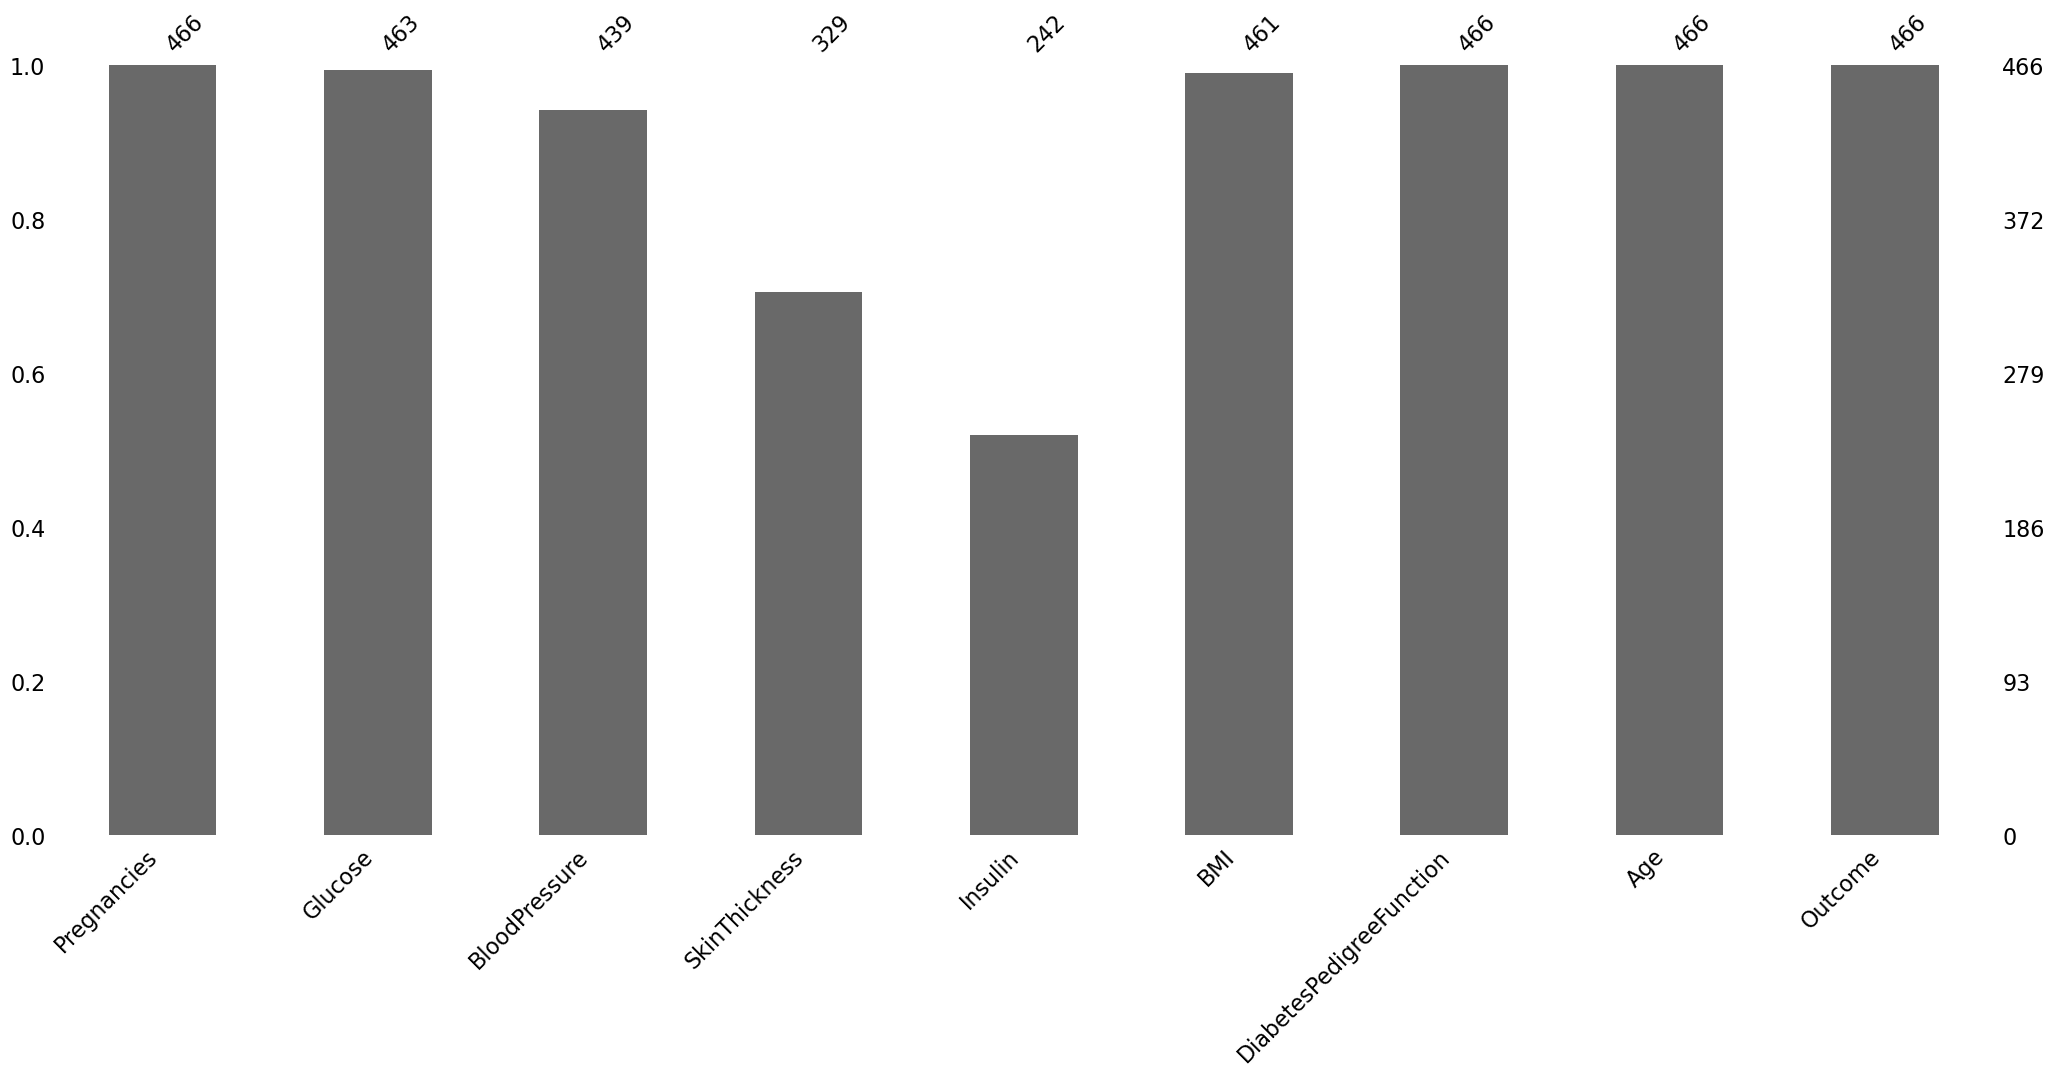

In [18]:
msno.bar(data);

## 2.3 Работа с аномалиями

Построим boxplot для каждого признака, чтобы посмотреть на наличие аномалий

<AxesSubplot:>

<Figure size 500x500 with 0 Axes>

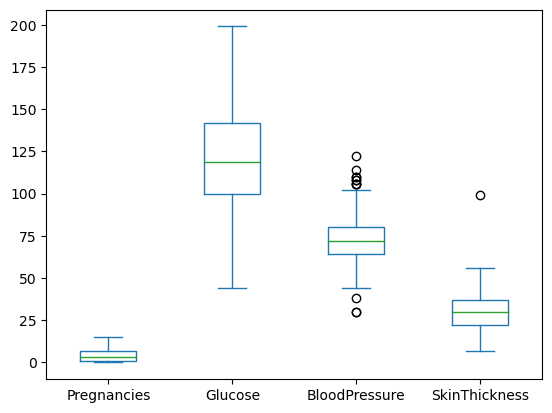

In [19]:
plt.figure(figsize=(5,5))

data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness']].plot(kind='box')

<AxesSubplot:>

<Figure size 500x500 with 0 Axes>

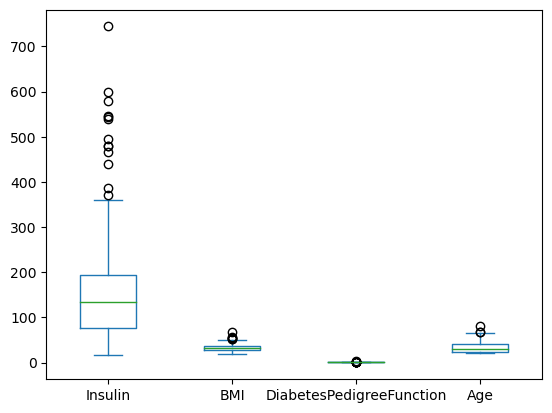

In [20]:
plt.figure(figsize=(5,5))

data[['Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].plot(kind='box')

Аномалии присутсвуют во всех признаках. 
Посмотрим отдельно по каждому признаку значения его квартилей и количество строк с выбросами по конкретному признаку

In [21]:
# исследуем аномалии
q1 = []
q3 = []
iqr = []
count = []

# последний признак Outcome - бинарный класс
col_names = data.columns[:-1]
for col in col_names:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    q1.append(Q1)
    q3.append(Q3)
    iqr.append(Q3 - Q1)
    count.append(len(data[(data[col] < Q1-1.5*IQR ) | (data[col] > Q3+1.5*IQR)]))
    

table_content = {'Q1': q1, 'IQR': iqr, 'Q3': q3, 'count': count}


table_anomaly_research = pd.DataFrame(table_content, index=col_names)
table_anomaly_research

,Q1,IQR,Q3,count
Pregnancies,1.00000,6.00000,7.0000,0
Glucose,100.00000,42.00000,142.0000,0
BloodPressure,64.00000,16.00000,80.0000,12
SkinThickness,22.00000,15.00000,37.0000,1
Insulin,77.25000,115.50000,192.7500,13
BMI,27.70000,9.70000,37.4000,6
DiabetesPedigreeFunction,0.24025,0.39525,0.6355,12
Age,24.00000,17.00000,41.0000,3


Рассмотрим аномальные значения для BloodPressure, Insulin и DiabetesPedigreeFunction.

In [22]:
# Кровяное давление
Q1_BP = table_anomaly_research['Q1']['BloodPressure']
Q3_BP = table_anomaly_research['Q3']['BloodPressure']
IQR_BP = table_anomaly_research['IQR']['BloodPressure']
df_an_BP = data[(data['BloodPressure'] < Q1_BP-1.5*IQR_BP ) | (data['BloodPressure'] > Q3_BP+1.5*IQR_BP)]
df_an_BP['BloodPressure'].value_counts()

106.0    3
30.0     2
110.0    2
108.0    2
122.0    1
38.0     1
114.0    1
Name: BloodPressure, dtype: int64

In [23]:
# Кровяное давление
Q1_BP = table_anomaly_research['Q1']['Insulin']
Q3_BP = table_anomaly_research['Q3']['Insulin']
IQR_BP = table_anomaly_research['IQR']['Insulin']
df_an_BP = data[(data['Insulin'] < Q1_BP-1.5*IQR_BP ) | (data['Insulin'] > Q3_BP+1.5*IQR_BP)]
df_an_BP['Insulin'].value_counts()

480.0    2
543.0    1
495.0    1
744.0    1
370.0    1
545.0    1
465.0    1
579.0    1
600.0    1
440.0    1
540.0    1
387.0    1
Name: Insulin, dtype: int64

In [24]:
# Кровяное давление
Q1_BP = table_anomaly_research['Q1']['DiabetesPedigreeFunction']
Q3_BP = table_anomaly_research['Q3']['DiabetesPedigreeFunction']
IQR_BP = table_anomaly_research['IQR']['DiabetesPedigreeFunction']
df_an_BP = data[(data['DiabetesPedigreeFunction'] < Q1_BP-1.5*IQR_BP ) | (data['DiabetesPedigreeFunction'] > Q3_BP+1.5*IQR_BP)]
df_an_BP['DiabetesPedigreeFunction'].value_counts()

1.390    1
1.781    1
1.321    1
2.329    1
1.318    1
1.353    1
2.137    1
1.600    1
1.251    1
1.699    1
1.461    1
1.394    1
Name: DiabetesPedigreeFunction, dtype: int64

Значения, распознанные как выбросы, имеют допустимые значения для диагностирования диабета. Удалять эксземпляры нельзя.

# 3. Заполняем пропуски

In [25]:
data.isna().sum()

Pregnancies                   0
Glucose                       3
BloodPressure                27
SkinThickness               137
Insulin                     224
BMI                           5
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [26]:
df_mean_fill = mean_fill.mean_fill(data)

In [27]:
df_median_fill = median_fill.median_fill(data)

In [28]:
df_min_fill = min_fill.min_fill(data)

In [29]:
df_max_fill = df_min_fill = max_fill.max_fill(data)

In [30]:
df_interpolate_fill = interpolate_fill.interpolate_fill(data)

In [31]:
df_LinearReg_fill = LinearRegression_fill.linreg_imputer(data)

In [32]:
df_KNNImputer_fill = KNNImputer_fill.KNNImputer_fill(data)
df_KNNImputer_fill = np.round(df_KNNImputer_fill).astype(int)

In [33]:
df_DecisionTree_fill = DecisionTreeRegressor_fill.DecisionTree_imputer(data)

In [34]:
df_RandomForest_fill = RandomForestRegressor_fill.RandomForest_imputer(data)

In [35]:
df_SVM_fill = SVR_fill.SVM_imputer(data)

In [36]:
df_XGBRegressor_fill = XGBRegressor_fill.XGBRegressor_imputer(data)

In [37]:
df_CatBoostRegressor_fill = CatBoostRegressor_fill.CatBoostRegressor_imputer(data)

## 4 Предсказание

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

import random
random.seed(42)
np.random.seed(42)

arr_df = [df_mean_fill, df_median_fill, df_min_fill, df_max_fill, df_interpolate_fill, df_LinearReg_fill, df_KNNImputer_fill, df_DecisionTree_fill,
         df_RandomForest_fill, df_SVM_fill, df_XGBRegressor_fill, df_CatBoostRegressor_fill]

arr_df_str = ['df_mean_fill', 'df_median_fill', 'df_min_fill', 'df_max_fill', 'df_interpolate_fill', 'df_LinearReg_fill', 'df_KNNImputer_fill', 'df_DecisionTree_fill',
         'df_RandomForest_fill', 'df_SVM_fill', 'df_XGBRegressor_fill', 'df_CatBoostRegressor_fill']

arr_df_str
test = pd.read_csv('test.csv')
id_col = test['Id']
test.drop(columns='Id', inplace=True)
for num, i in enumerate(arr_df):
    x = i.iloc[:, :-1]
    y = i.iloc[:,-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
    rfc = RandomForestClassifier()
    model = rfc.fit(x_train,y_train)
    pred_test = model.predict(test)
    pred_test = pd.DataFrame(pred_test,columns=['Outcome'])
    res = pd.concat([id_col,pred_test],axis='columns')
    res.to_csv(f"solution_{str(arr_df_str[num])}.csv", index=False)